In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm
from scipy import stats

In [20]:
general_population = np.random.normal(loc = 5, size=1_000_000)

def get_confidence_interval(sample, confidence_level=0.95):
  m = sample.mean()
  sigma = sum(np.power([i - m], 2) for i in sample)/(len(sample) - 1)
  dof = len(sample) - 1
  alpha = 1 - confidence_level
  t_crit = t.ppf(confidence_level + alpha/2, dof)
  sem = sigma / np.sqrt(len(sample))
  l = m - t_crit * sem
  r = m + t_crit * sem
  return (float(l), float(r))

In [30]:
series_count = 100
sample_size = 10_000

intervals = []
for _ in range(series_count):
  sample = np.random.choice(general_population, size = sample_size, replace=False)
  intervals.append(get_confidence_interval(sample, confidence_level=0.95))

is_in_interval = []

general_mean = general_population.mean()

for interval in intervals:
  if interval[0] < general_mean < interval[1]:
    is_in_interval.append(1)
  else:
    is_in_interval.append(0)
  
print('percentage of intervals covering the true mean ', sum(is_in_interval) * 100/ len(is_in_interval))

percentage of intervals covering the true mean  97.0


[(29, (4.954032305398349, 4.993252252417103)), (63, (4.953209315301631, 4.993247206818467)), (81, (4.962946284807678, 5.001236468716877))]


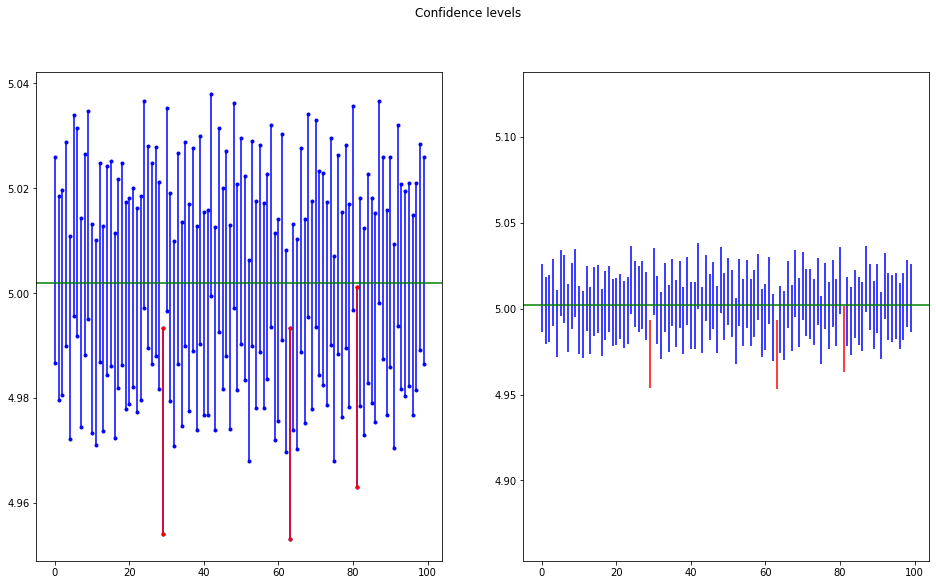

In [31]:
gp_mean = general_population.mean()
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(fig.get_size_inches() + (10, 5))
xs = np.tile(np.arange(len(intervals)), (2,1))
ys = np.array(intervals).T
interval_is_cover_mean = [interval[0] < gp_mean < interval[1] for interval in intervals]
colors = np.where(interval_is_cover_mean, 'b', 'r')
axs[0].plot(xs, ys,  marker=".", color='b')
axs[0].axhline(y = gp_mean, color='g')

out_of_interval = [(i, interval) for i, interval in enumerate(intervals) if not interval[0] < gp_mean < interval[1]]
print(out_of_interval)
for out in out_of_interval:
  axs[0].plot((out[0], out[0]), out[1], color='r', marker='.')


colors = np.where(interval[0] < gp_mean )
xs = np.arange(len(intervals))
axs[1].set_ylim(np.array(intervals).min() - 0.1, np.array(intervals).max() + 0.1)
for x,interval in zip(xs, intervals):
  color = 'b' if interval[0] < gp_mean < interval[1] else 'r'
  axs[1].vlines(x=x, color=color, ymin=interval[0], ymax=interval[1], linestyle='solid')
axs[1].axhline(y=gp_mean, color='g')
fig.suptitle('Confidence levels')
fig.show()

In [27]:
intervals

[(4.986664824454363, 5.025399558434908),
 (4.979553853836023, 5.018499881343576),
 (4.961823719632729, 5.0004341864801365),
 (4.978382698427105, 5.017919996581161),
 (4.962013939611911, 5.001535053329929),
 (4.9771477592791, 5.016899005729507),
 (4.960031520122257, 4.999093252042851),
 (4.997062470365824, 5.035962993398105),
 (4.988896114484268, 5.027261607313816),
 (4.97823721363365, 5.016677421869994),
 (4.990385155662565, 5.0298075946719365),
 (4.95778931563445, 4.995683870908179),
 (4.9674431176729135, 5.006273173629904),
 (4.9856322351253235, 5.024883264339416),
 (4.969524306650616, 5.010075900443049),
 (4.977852157157218, 5.016737290709545),
 (4.990797415066356, 5.0301391655560925),
 (5.0025696767931365, 5.041887526015213),
 (4.980066257390182, 5.0197318208473325),
 (4.980150721335544, 5.019491398215731),
 (4.9897350661599145, 5.028815861833161),
 (4.9768306272295595, 5.01497619823778),
 (4.990373631192791, 5.028959795784437),
 (4.983792937013295, 5.023363251373652),
 (4.98106548